In [1]:
import tensorcircuit as tc
n = 2
c = tc.Circuit(n, inputs=tc.backend.eye(2**n))
c.X(1)
tc.backend.reshapem(c.state())

Please first ``pip install -U qiskit`` to enable related functionality in translation module


array([[0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]], dtype=complex64)

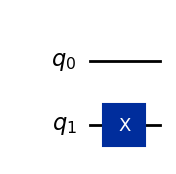

In [2]:
c.draw(output='mpl')